# Evaluating HiTZ/latxa-7b-1v on Sentiment Analysis with Few-Shot Learning Approach

This project aims to evaluate the recently released Latxa language model, specifically  [HiTZ/latxa-7b-v1](https://huggingface.co/HiTZ/latxa-7b-v1?library=true), on sentiment analysis using 5-shot learning approach. We also intend to analyze how the use of different prompts impact on the overall performance of the model. Last but not least, we plan to compare the model's performance against its parent model [meta-llama/Llama-2-7b](https://huggingface.co/meta-llama/Llama-2-7b). To this end, we will use [lm-evaluation-harness](https://github.com/EleutherAI/lm-evaluation-harness/tree/main) framework, which allows a wide range of zero- and few-shot evaluation tasks on autoregressive language models.

To get started, we need to fork the [main repository](https://github.com/EleutherAI/lm-evaluation-harness) and clone it. This involves creating a copy of the original repository within our own GitHub account. Then we create a branch with the name of our project, and install the requirements our your environment.


In [ ]:
!git clone https://github.com/amaiamurillo/lm-evaluation-harness/
%cd lm-evaluation-harness
!git checkout DL4NLP
!pip install -e .

Cloning into 'lm-evaluation-harness'...
remote: Enumerating objects: 25444, done.
remote: Counting objects: 100% (4264/4264), done.
remote: Compressing objects: 100% (549/549), done.
remote: Total 25444 (delta 4002), reused 3721 (delta 3715), pack-reused 21180
Receiving objects: 100% (25444/25444), 21.52 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (17318/17318), done.
/content/lm-evaluation-harness
Branch 'DL4NLP' set up to track remote branch 'DL4NLP' from 'origin'.
Switched to a new branch 'DL4NLP'
Obtaining file:///content/lm-evaluation-harness
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for lm_eval (pyproject.toml) ... done
  Created wheel for lm_eval: filename=lm_eval-0.4.2-0.editable-py3-none-any.whl size=15076 sha256=d621bd1e06ba3e68c3568926cab2e4f2aafd860d8af98ff1f37f2be424274b28
  Stored in d

Once we have cloned the repository, we create a folder in order to store the tasks we will define later.

In [ ]:
# Check currenty directory
%pwd

'/content/lm-evaluation-harness'

In [ ]:
# Change directory
%cd lm_eval/tasks

/content/lm-evaluation-harness/lm_eval/tasks


In [ ]:
# Create new folder
!mkdir DL4NLP_project

In [ ]:
# Change directory to the newly created folder
%cd DL4NLP_project

/content/lm-evaluation-harness/lm_eval/tasks/DL4NLP_project


## Prompts

After creating the folder, we define the tasks for evaluating the model, which should be specified in YAML format. In this case, we will maintain the same configuration across all tasks except for the prompts. This strategy allows us to observe how performance varies with each prompt. We will define 5 tasks, each designed to assess the model's performance using a different prompt.

### Prompt 1
This was the original prompt proposed by HiTZ research center, which can be found in the following repositories: [juletx](https://github.com/juletx/lm-evaluation-harness/blob/eustrivia/lm_eval/tasks/basqueglue/bec.yaml) and [naiarapm](https://github.com/naiarapm/lm-evaluation-harness/blob/basqueglue/lm_eval/tasks/basqueglue/bec.yaml).

In [ ]:
# Create the tasks corresponding to the first prompt
!touch prompt1.yaml

In [ ]:
# Task specifications for prompt 1
%%writefile prompt1.yaml
group: prompts
task: prompt1
dataset_path: orai-nlp/basqueGLUE
dataset_name: bec
output_type: multiple_choice
validation_split: validation
test_split: test
doc_to_text: "Testua: {{text}}\nGaldera: Nolako jarrera agertzen du aurreko testuak?\nErantzuna:"
doc_to_target: label
doc_to_choice: ['negatiboa', 'neutrala', 'positiboa']
metric_list:
  - metric: acc
    aggregation: mean
    higher_is_better: true
metadata:
  - version: 1.0

Overwriting prompt1.yaml


### Prompt 2


In [ ]:
# Create the tasks corresponding to the second prompt
!touch prompt2.yaml

In [ ]:
# Task specifications for prompt 2
%%writefile prompt2.yaml
group: prompts
task: prompt2
dataset_path: orai-nlp/basqueGLUE
dataset_name: bec
output_type: multiple_choice
validation_split: validation
test_split: test
doc_to_text: "Txioa: {{text}}\nAgindua: Sailkatu aurreko txioa agertzen duen jarraren arabera. \nJarrera:"
doc_to_target: label
doc_to_choice: ['negatiboa', 'neutrala', 'positiboa']
metric_list:
  - metric: acc
    aggregation: mean
    higher_is_better: true
metadata:
  - version: 1.0

Overwriting prompt2.yaml


### Prompt 3

In [ ]:
# Create the tasks corresponding to the third prompt
!touch prompt3.yaml

In [ ]:
# Task specifications for prompt 3
%%writefile prompt3.yaml
group: prompts
task: prompt3
dataset_path: orai-nlp/basqueGLUE
dataset_name: bec
output_type: multiple_choice
validation_split: validation
test_split: test
doc_to_text: "Testua: {{text}}\nGaldera: Zein da aurreko testuaren tonua: negatiboa, neutrala ala positiboa?\nErantzuna:"
doc_to_target: label
doc_to_choice: ['negatiboa', 'neutrala', 'positiboa']
metric_list:
  - metric: acc
    aggregation: mean
    higher_is_better: true
metadata:
  - version: 1.0

Overwriting prompt3.yaml


### Prompt 4

In [ ]:
# Create the tasks corresponding to the fourth prompt
!touch prompt4.yaml

In [ ]:
# Task specifications for prompt 4
%%writefile prompt4.yaml
group: prompts
task: prompt4
dataset_path: orai-nlp/basqueGLUE
dataset_name: bec
output_type: multiple_choice
validation_split: validation
test_split: test
doc_to_text: "Testua: {{text}}\nGaldera: Aurreko testuan adierazitako sentimendua negatiboa, neutrala ala positiboa da?\nErantzuna:"
doc_to_target: label
doc_to_choice: ['negatiboa', 'neutrala', 'positiboa']
metric_list:
  - metric: acc
    aggregation: mean
    higher_is_better: true
metadata:
  - version: 1.0

Overwriting prompt4.yaml


### Prompt 5

In [ ]:
# Create the tasks corresponding to the fifth prompt
!touch prompt5.yaml

In [ ]:
# Task specifications for prompt 5
%%writefile prompt5.yaml
group: prompts
task: prompt5
dataset_path: orai-nlp/basqueGLUE
dataset_name: bec
output_type: multiple_choice
validation_split: validation
test_split: test
doc_to_text: "Testua: {{text}}\nGaldera: Nolakoa da aurreko testuaren tonua?\nErantzuna:"
doc_to_target: label
doc_to_choice: ['negatiboa', 'neutrala', 'positiboa']
metric_list:
  - metric: acc
    aggregation: mean
    higher_is_better: true
metadata:
  - version: 1.0

Overwriting prompt5.yaml


## Evaluate HiTZ/latxa-7b-1v

Now that we have defined the prompts, let's evaluate our model using the prompts one by one.

### Prompt 1

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=HiTZ/latxa-7b-v1 \
    --tasks prompt1 \
    --device cuda \
    --output_path ./prompt1_latxa.json \
    --num_fewshot 5 \
    --log_samples

2024-03-07 18:26:13.711415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 18:26:13.711466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 18:26:13.712804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 18:26:15.384427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-07:18:26:19,774 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-07:18:26:19,774 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

We will save the results in JSON format.

In [ ]:
from google.colab import files

files.download('pretrained__HiTZ__latxa-7b-v1_prompt1.jsonl')
files.download('prompt1_latxa.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 2

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=HiTZ/latxa-7b-v1 \
    --tasks prompt2 \
    --device cuda \
    --output_path ./prompt2_latxa.json \
    --num_fewshot 5 \
    --log_samples

2024-03-07 15:47:34.783246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 15:47:34.783306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 15:47:34.784811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 15:47:36.240417: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-07:15:47:41,722 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-07:15:47:41,722 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__HiTZ__latxa-7b-v1_prompt2.jsonl')
files.download('prompt2_latxa.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 3

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=HiTZ/latxa-7b-v1 \
    --tasks prompt3 \
    --device cuda \
    --output_path ./prompt3_latxa.json \
    --num_fewshot 5 \
    --log_samples

2024-03-07 16:43:52.750128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 16:43:52.750194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 16:43:52.753467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 16:43:54.678528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-07:16:44:00,589 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-07:16:44:00,590 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__HiTZ__latxa-7b-v1_prompt3.jsonl')
files.download('prompt3_latxa.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 4

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=HiTZ/latxa-7b-v1 \
    --tasks prompt4 \
    --device cuda \
    --output_path ./prompt4_latxa.json \
    --num_fewshot 5 \
    --log_samples

2024-03-19 11:31:00.444261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 11:31:00.444314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 11:31:00.445655: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 11:31:01.665103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-19:11:31:08,640 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-19:11:31:08,640 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__HiTZ__latxa-7b-v1_prompt4.jsonl')
files.download('prompt4_latxa.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 5

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=HiTZ/latxa-7b-v1 \
    --tasks prompt5 \
    --device cuda \
    --output_path ./prompt5_latxa.json \
    --num_fewshot 5 \
    --log_samples

2024-03-19 14:00:21.216202: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 14:00:21.216254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 14:00:21.217552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 14:00:22.428586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-19:14:00:26,175 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-19:14:00:26,175 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__HiTZ__latxa-7b-v1_prompt5.jsonl')
files.download('prompt5_latxa.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Evaluate meta-llama/Llama-2-7b

After evaluating HiTZ/latxa-7b-v1, we intend to assess its predecessor in order to compare their performance. To achieve this goal, first, we need to request access to the model through Hugging Face. Once the request has been accepted by the repo authors, we are able to carry out the evaluation.

In [ ]:
!pip install huggingface-hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Following the same approach as before, we will employ the same prompts to evaluate Llama 2.

### Prompt 1

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=meta-llama/Llama-2-7b-hf \
    --tasks prompt1 \
    --device cuda \
    --output_path ./prompt1_llama.json \
    --num_fewshot 5 \
    --log_samples

2024-03-07 19:49:40.139061: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 19:49:40.139118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 19:49:40.140609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 19:49:41.351687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-07:19:49:45,374 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-07:19:49:45,374 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__meta-llama__Llama-2-7b-hf_prompt1.jsonl')
files.download('prompt1_llama.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 2

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=meta-llama/Llama-2-7b-hf \
    --tasks prompt2 \
    --device cuda \
    --output_path ./prompt2_llama.json \
    --num_fewshot 5 \
    --log_samples

2024-03-07 20:00:37.282792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 20:00:37.282850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 20:00:37.284337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 20:00:38.627450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-07:20:00:43,206 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-07:20:00:43,206 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__meta-llama__Llama-2-7b-hf_prompt2.jsonl')
files.download('prompt2_llama.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 3

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=meta-llama/Llama-2-7b-hf \
    --tasks prompt3 \
    --device cuda \
    --output_path ./prompt3_llama.json \
    --num_fewshot 5 \
    --log_samples

2024-03-07 20:11:54.542718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 20:11:54.542777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 20:11:54.544239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 20:11:55.864066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-07:20:12:00,425 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-07:20:12:00,425 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__meta-llama__Llama-2-7b-hf_prompt3.jsonl')
files.download('prompt3_llama.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 4

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=meta-llama/Llama-2-7b-hf \
    --tasks prompt4 \
    --device cuda \
    --output_path ./prompt4_llama.json \
    --num_fewshot 5 \
    --log_samples

2024-03-19 13:38:17.178386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 13:38:17.178433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 13:38:17.179845: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 13:38:18.428139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-19:13:38:24,595 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-19:13:38:24,595 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__meta-llama__Llama-2-7b-hf_prompt4.jsonl')
files.download('prompt4_llama.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prompt 5

In [ ]:
!lm_eval \
    --model hf \
    --model_args pretrained=meta-llama/Llama-2-7b-hf \
    --tasks prompt5 \
    --device cuda \
    --output_path ./prompt5_llama.json \
    --num_fewshot 5 \
    --log_samples

2024-03-19 13:50:18.380024: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 13:50:18.380080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 13:50:18.381507: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 13:50:19.726759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-19:13:50:23,627 INFO     [__main__.py:217] Verbosity set to INFO
2024-03-19:13:50:23,627 INFO     [__init__.py:369] lm_eval.tasks.initialize_tasks() is deprecated and no longer necessary. It will be removed in v0.4.2 release. TaskMan

In [ ]:
files.download('pretrained__meta-llama__Llama-2-7b-hf_prompt5.jsonl')
files.download('prompt5_llama.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Random guesser

According to [Latxa's model card](https://huggingface.co/HiTZ/latxa-7b-v1), in the case of Basque and other low-resource languages, the performance of LLMs is comparable to that of a random guesser. Latxa was developed to address the challenges posed by limited linguistic resources, using the high-quality language-specific corpus EusCrawl during the training. Therefore, we are going to create a random guesser in order to observe the difference in performance between Latxa and a random guesser. The dataset we are employing is labeled with three classes: negative, neutral, and positive. Therefore, the probability of a model making a correct prediction by chance would be 33.33%.

In [ ]:
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score

# Load the dataset from Hugging Face
dataset = load_dataset("orai-nlp/basqueGLUE", "bec", trust_remote_code=True)

# Implement the Random Guesser
class RandomGuesser:
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def predict(self, X):
        return np.random.randint(0, self.num_classes, size=len(X))

# Get the real labels for the test set
y_test = dataset['test']['label']

# Get the samples without the labels for the test set
X_test = dataset['test']["text"]

# Evaluate the Random Guesser
random_guesser = RandomGuesser(num_classes=3)

# Generate random predictions
y_pred_random = random_guesser.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_random)
print("Accuracy of a random guesser:", accuracy)

Accuracy of a random guesser: 0.33102918586789554


## Results

Finally, we plot the results to visually compare the difference in performance between Latxa and Llama 2 across the five prompts.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import os
import pandas as pd

folder_path = '/content/drive/My Drive/Colab Notebooks/DL4NLP/Results_Latxa'
file_names = os.listdir(folder_path)
results_latxa = {}

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    if file_path.endswith('.json'):
        with open(file_path, 'r') as f:
            data = json.load(f)
            prompt_key = file_name.split('_')[0].lower()
            acc = data['results'][prompt_key]['acc,none']
            results_latxa[prompt_key] = acc

df_latxa = pd.DataFrame(list(results_latxa.items()), columns=['Prompt', 'Accuracy'])
results_latxa = df_latxa.reset_index(drop=True)
print("Latxa:")
print(results_latxa)


Latxa:
    Prompt  Accuracy
0  prompt2  0.545315
1  prompt3  0.565284
2  prompt1  0.556068
3  prompt4  0.480031
4  prompt5  0.578341


In [ ]:
folder_path = '/content/drive/My Drive/Colab Notebooks/DL4NLP/Results_Llama'
file_names = os.listdir(folder_path)
results_llama = {}

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    if file_path.endswith('.json'):
        with open(file_path, 'r') as f:
            data = json.load(f)
            prompt_key = file_name.split('_')[0].lower()
            acc = data['results'][prompt_key]['acc,none']
            results_llama[prompt_key] = acc

df_llama = pd.DataFrame(list(results_llama.items()), columns=['Prompt', 'Accuracy'])
results_llama = df_llama.reset_index(drop=True)
print("Llama:")
print(results_llama)

Llama:
    Prompt  Accuracy
0  prompt1  0.415515
1  prompt2  0.413210
2  prompt3  0.394777
3  prompt4  0.416283
4  prompt5  0.420891


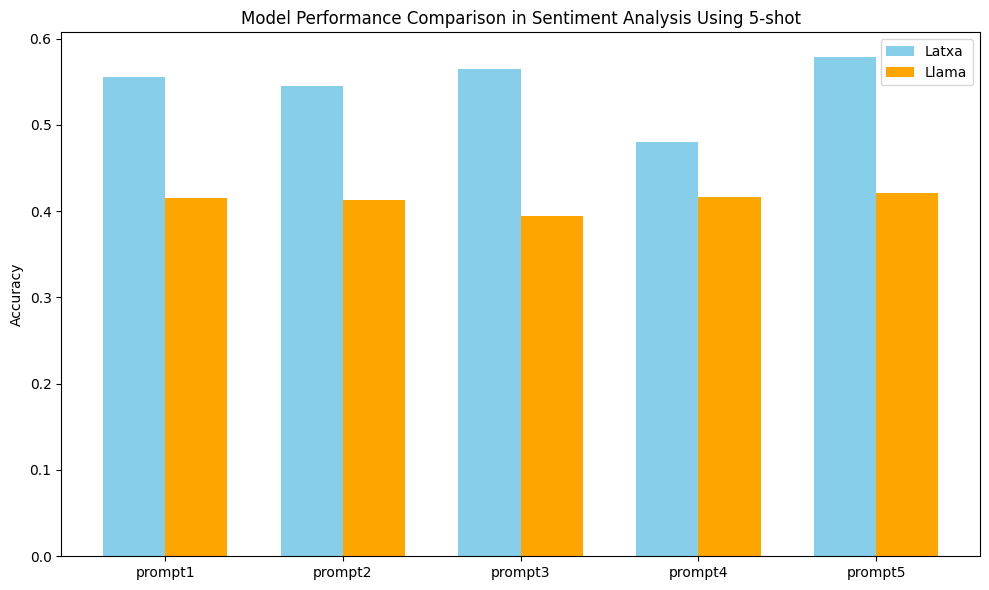

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the desired order for the prompts
prompt_order = ['prompt1', 'prompt2', 'prompt3', 'prompt4', 'prompt5']

# Ensure that DataFrames are in the same order for prompts
df_latxa['Prompt'] = pd.Categorical(df_latxa['Prompt'], categories=prompt_order, ordered=True)
df_llama['Prompt'] = pd.Categorical(df_llama['Prompt'], categories=prompt_order, ordered=True)
df_latxa.sort_values('Prompt', inplace=True)
df_llama.sort_values('Prompt', inplace=True)

# Bar width
bar_width = 0.35

# Bar positions
index = np.arange(len(prompt_order))

# Draw bars for Latxa
bars1 = ax.bar(index - bar_width/2, df_latxa['Accuracy'], bar_width, label='Latxa', color='skyblue')

# Draw bars for Llama
bars2 = ax.bar(index + bar_width/2, df_llama['Accuracy'], bar_width, label='Llama', color='orange')

# Set y-axis label
ax.set_ylabel('Accuracy')

# Set title
ax.set_title('Model Performance Comparison in Sentiment Analysis Using 5-shot')

# Set x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(prompt_order)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
